In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
aData = pd.read_csv("data/EEG_data.csv")
aData

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


29724.211553473848

videoId:  1 	mean:  50741.32390381896

videoId:  2 	mean:  45711.39638932496

videoId:  3 	mean:  39207.293532338306

videoId:  4 	mean:  54195.83849557522

videoId:  5 	mean:  33429.015447154474

videoId:  6 	mean:  34112.49703640982

videoId:  7 	mean:  24796.997451146985

videoId:  8 	mean:  30126.49453125

videoId:  9 	mean:  29724.211553473848
[50741.32390382 45711.39638932 39207.29353234 54195.83849558
 33429.01544715 34112.49703641 24796.99745115 30126.49453125
 29724.21155347]


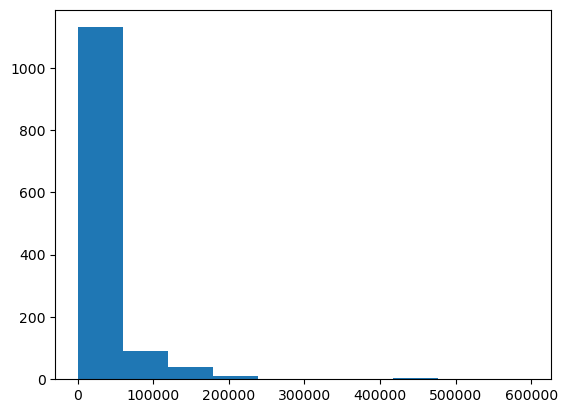

In [21]:
df_0 = aData[aData['VideoID'] == 9]
df_0

df_0_Beta2 = np.array(df_0['Beta2'])
df_0_Beta2Average = np.mean(df_0_Beta2)

plt.hist(df_0_Beta2)
print(df_0_Beta2Average)

y = np.array([])

videoId = 1
while videoId <=9:
    arr = aData[aData['VideoID'] == videoId]
    arrC = np.array(arr['Beta2'])
    mean = np.average(arrC)
    print("\nvideoId: ",videoId, "\tmean: ", mean)
    y = np.append(y,mean)
    videoId+=1


print(y)



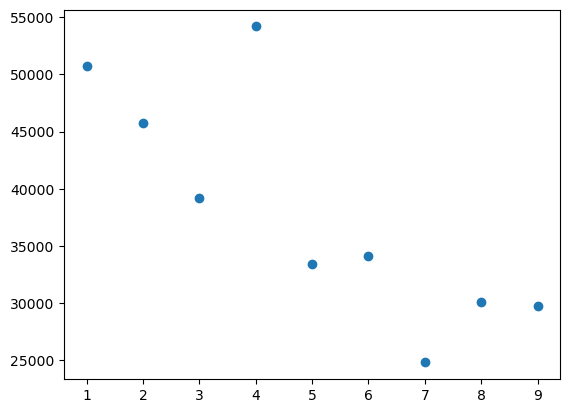

In [22]:
x = np.array([1,2,3,4,5,6,7,8,9])
plt.scatter(x,y)


In [23]:
# Computing Cost


In [51]:
def compute_cost(x, y, w, b): 
    m = x.shape[0]

    costSum = 0

    f_wb = w * x + b
    cost = np.sum((f_wb - y) ** 2)

    totalCost =(1/(2*m)) * cost

    return totalCost


compute_cost(x,y,50000,1000)

32061160337.56479